### Image Classification Using Tensorflow

In [ ]:
pip install tflite-model-maker

     |████████████████████████████████| 616 kB 5.3 MB/s 
     |████████████████████████████████| 840 kB 35.3 MB/s 
     |████████████████████████████████| 1.1 MB 33.3 MB/s 
     |████████████████████████████████| 64 kB 3.0 MB/s 
     |████████████████████████████████| 213 kB 44.6 MB/s 
     |████████████████████████████████| 3.4 MB 42.1 MB/s 
     |████████████████████████████████| 596 kB 46.2 MB/s 
     |████████████████████████████████| 120 kB 49.3 MB/s 
     |████████████████████████████████| 6.3 MB 34.1 MB/s 
     |████████████████████████████████| 1.2 MB 39.0 MB/s 
     |████████████████████████████████| 1.1 MB 38.3 MB/s 
     |████████████████████████████████| 87 kB 7.3 MB/s 
     |████████████████████████████████| 25.3 MB 59.0 MB/s 
     |████████████████████████████████| 99 kB 6.5 MB/s 
     |████████████████████████████████| 47.6 MB 1.5 MB/s 
     |████████████████████████████████| 352 kB 31.9 MB/s 
     |████████████████████████████████| 208 kB 22.3 MB/s 
  Created wheel for 

### Importing Necessary Libraries

In [ ]:
import os

import numpy as np

import tensorflow as tf
assert tf.__version__.startswith('2')

from tflite_model_maker import model_spec
from tflite_model_maker import image_classifier
from tflite_model_maker.config import ExportFormat
from tflite_model_maker.config import QuantizationConfig
from tflite_model_maker.image_classifier import DataLoader

import matplotlib.pyplot as plt

### Set up Kaggle to directly Download the Stanford Dogs Dataset

In [ ]:
!pip install kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download jessicali9530/stanford-dogs-dataset

 98% 737M/750M [00:06<00:00, 102MB/s]
100% 750M/750M [00:06<00:00, 118MB/s]


###  Unzipping the downloaded dataset

In [ ]:
!unzip stanford-dogs-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: images/Images/n02108089-boxer/n02108089_11687.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_117.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_11807.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_11875.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_122.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_12232.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_125.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_12738.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_12739.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_12827.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_13340.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_13526.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_1353.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_1355.jpg  
  inflating: images/Images/n02108089-boxer/n021

### Renaming the Dataset Classes to remove extra characters in each class

In [ ]:
import os

path = "/content/images/Images"

directory_list = os.listdir(path)




for filename in directory_list:
    src = filename
    dst = filename[filename.find('-') + 1:]

    # print(dst)

    os.rename(os.path.join(path, src), os.path.join(path, dst))

print("Files renamed!")

Files renamed!


In [ ]:
image_path ="/content/images/Images"

### Using Data Loader to Load Class Data

In [ ]:
from tflite_model_maker.image_classifier import DataLoader

###  Splitting the Dataset into Test and Train (0.1:0.9)

In [ ]:
data = DataLoader.from_folder(image_path)
train_data, test_data = data.split(0.9)

INFO:tensorflow:Load image with size: 20580, num_label: 120, labels: Afghan_hound, African_hunting_dog, Airedale, American_Staffordshire_terrier, Appenzeller, Australian_terrier, Bedlington_terrier, Bernese_mountain_dog, Blenheim_spaniel, Border_collie, Border_terrier, Boston_bull, Bouvier_des_Flandres, Brabancon_griffon, Brittany_spaniel, Cardigan, Chesapeake_Bay_retriever, Chihuahua, Dandie_Dinmont, Doberman, English_foxhound, English_setter, English_springer, EntleBucher, Eskimo_dog, French_bulldog, German_shepherd, German_short-haired_pointer, Gordon_setter, Great_Dane, Great_Pyrenees, Greater_Swiss_Mountain_dog, Ibizan_hound, Irish_setter, Irish_terrier, Irish_water_spaniel, Irish_wolfhound, Italian_greyhound, Japanese_spaniel, Kerry_blue_terrier, Labrador_retriever, Lakeland_terrier, Leonberg, Lhasa, Maltese_dog, Mexican_hairless, Newfoundland, Norfolk_terrier, Norwegian_elkhound, Norwich_terrier, Old_English_sheepdog, Pekinese, Pembroke, Pomeranian, Rhodesian_ridgeback, Rottweil

###  Showing Random 25 images in dataset along with their class names

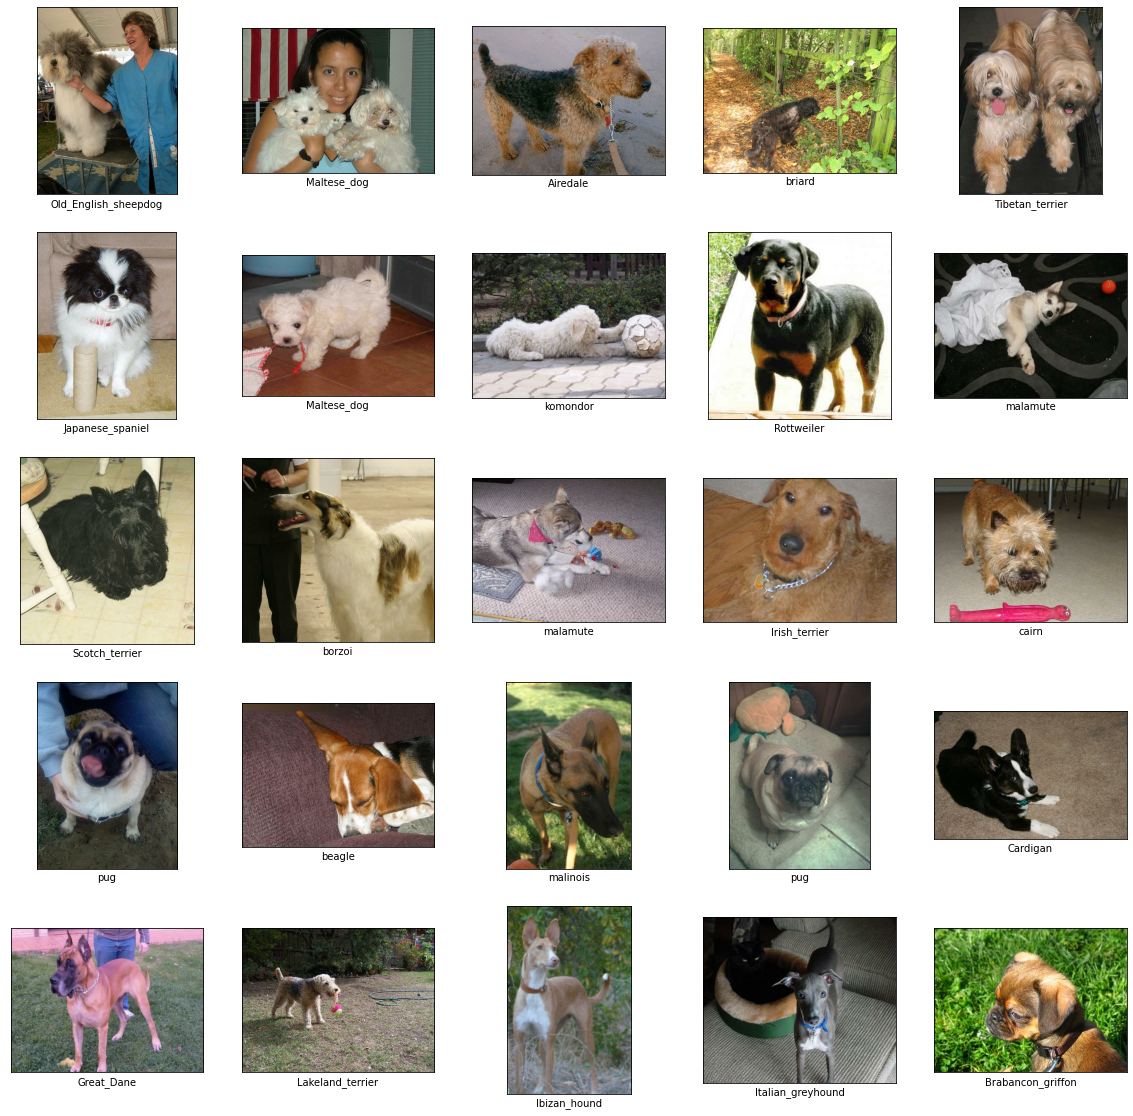

In [ ]:
plt.figure(figsize=(20,20))
for i, (image, label) in enumerate(data.gen_dataset().unbatch().take(25)):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)
  plt.xlabel(data.index_to_label[label.numpy()])
plt.show()

### Training Model with Resnet 50 in 10 Epoch Cycles

In [ ]:
model = image_classifier.create(train_data,model_spec=model_spec.get('resnet_50'),epochs=10)

INFO:tensorflow:Retraining the models...


INFO:tensorflow:Retraining the models...


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2_1 (Hub  (None, 2048)             23564800  
 KerasLayerV1V2)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 2048)              0         
                                                                 
 dense_1 (Dense)             (None, 120)               245880    
                                                                 
Total params: 23,810,680
Trainable params: 245,880
Non-trainable params: 23,564,800
_________________________________________________________________
None
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


578/578 [==============================] - 149s 248ms/step - loss: 2.2694 - accuracy: 0.6008
Epoch 2/10
578/578 [==============================] - 143s 247ms/step - loss: 1.7834 - accuracy: 0.7266
Epoch 3/10
578/578 [==============================] - 143s 248ms/step - loss: 1.6583 - accuracy: 0.7691
Epoch 4/10
578/578 [==============================] - 143s 248ms/step - loss: 1.5674 - accuracy: 0.7989
Epoch 5/10
578/578 [==============================] - 143s 247ms/step - loss: 1.5033 - accuracy: 0.8224
Epoch 6/10
578/578 [==============================] - 142s 245ms/step - loss: 1.4534 - accuracy: 0.8399
Epoch 7/10
578/578 [==============================] - 142s 246ms/step - loss: 1.4210 - accuracy: 0.8525
Epoch 8/10
578/578 [==============================] - 143s 247ms/step - loss: 1.3894 - accuracy: 0.8672
Epoch 9/10
578/578 [==============================] - 143s 247ms/step - loss: 1.3667 - accuracy: 0.8760
Epoch 10/10
578/578 [==============================] - 143s 247ms/step - lo

### Achieved an accuracy of 88.39% in Train Set 74.25 in Test Set

In [ ]:
loss, accuracy = model.evaluate(test_data)

65/65 [==============================] - 37s 257ms/step - loss: 1.7220 - accuracy: 0.7425


###  Displaying 50 Random Predictions with wrong predictions labelled in *red*

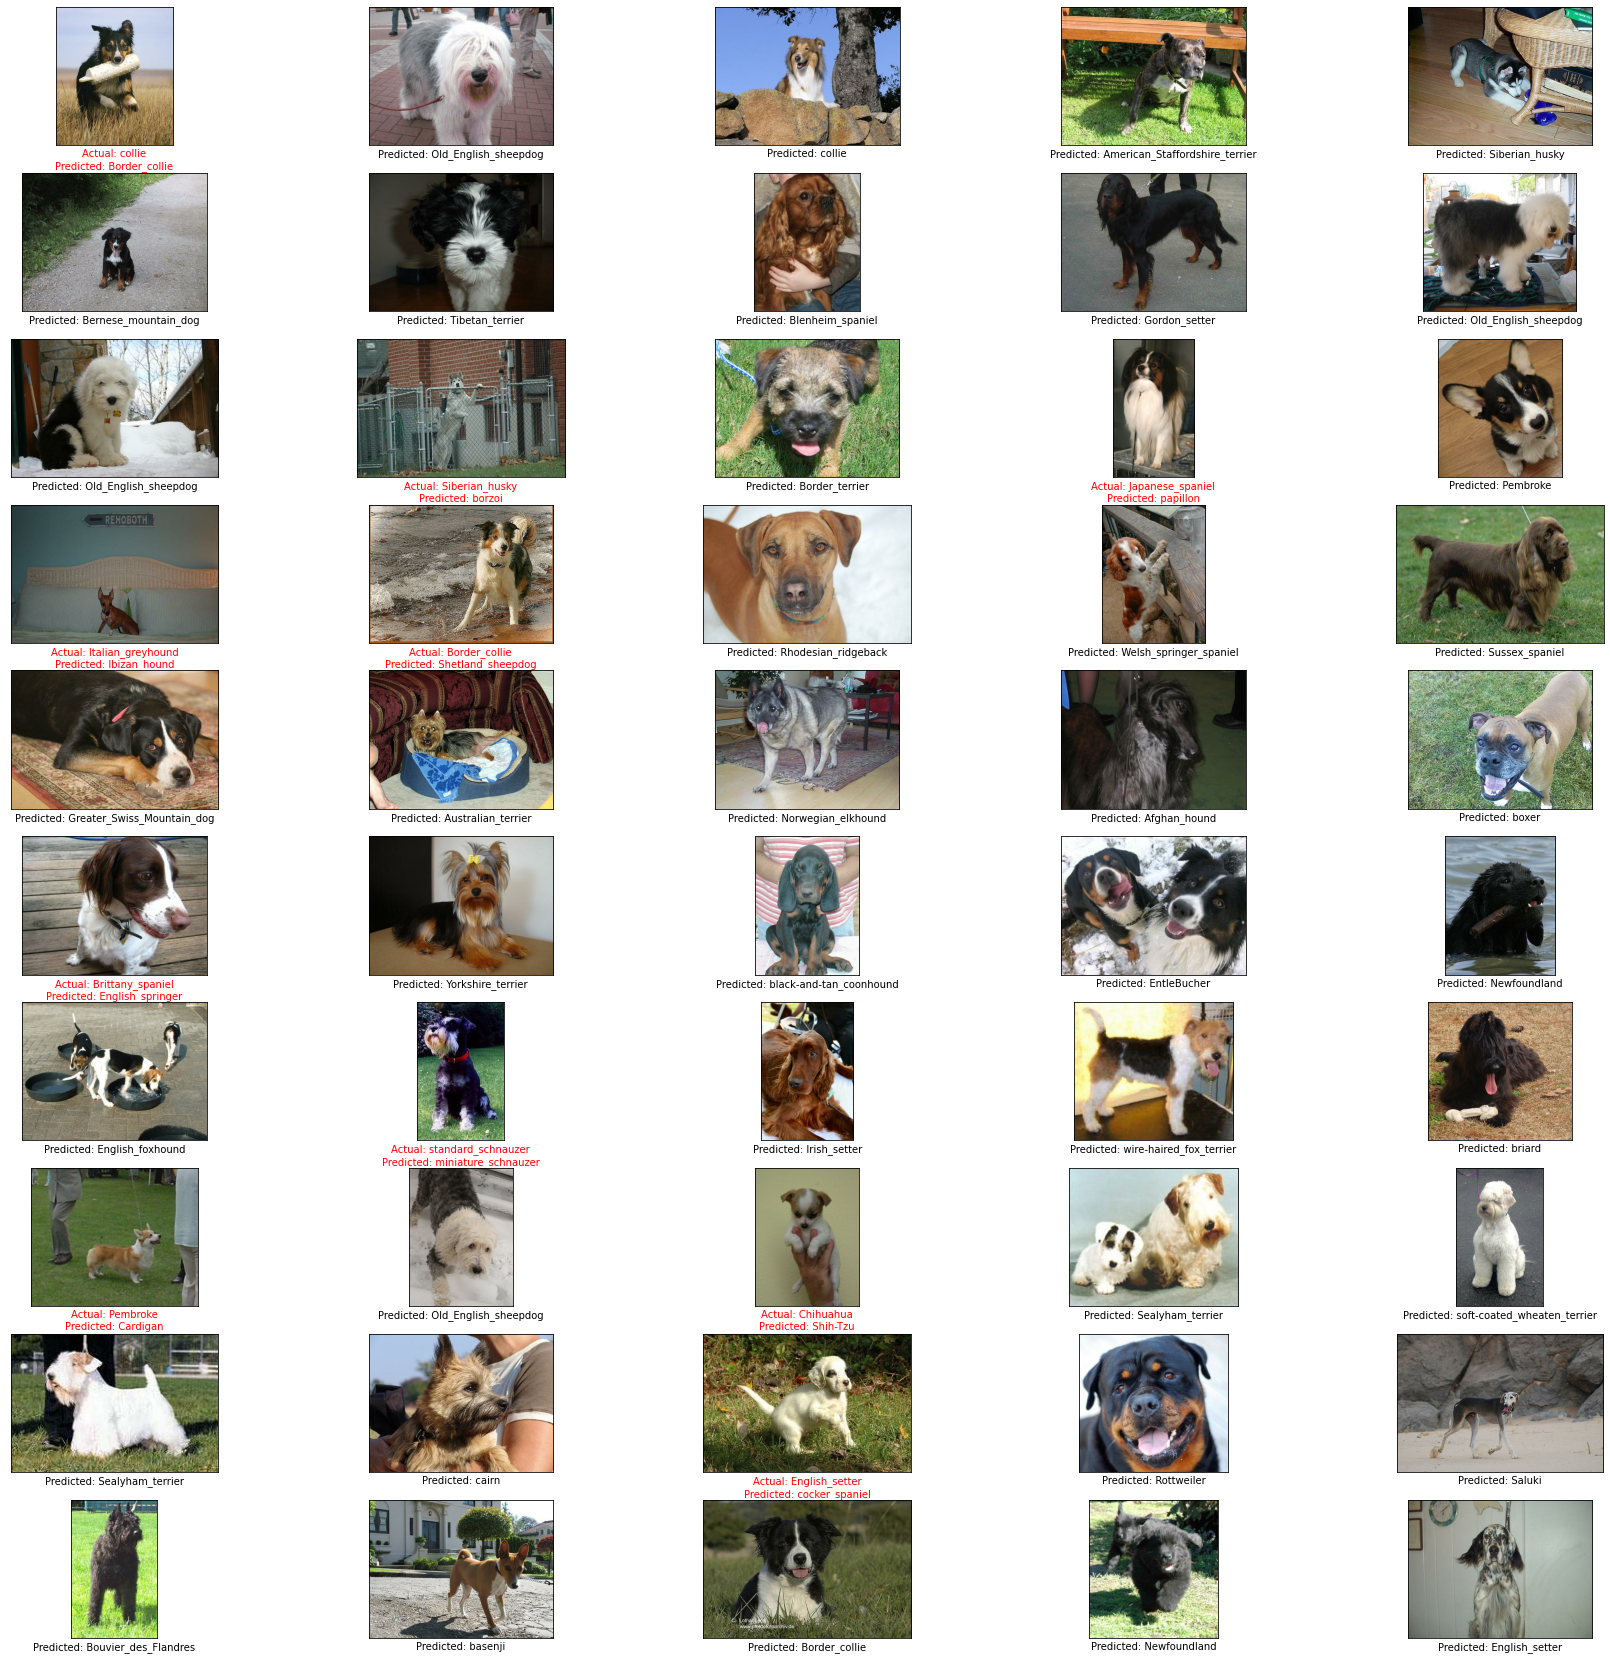

In [ ]:
# A helper function that returns 'red'/'black' depending on if its two input
# parameter matches or not.
def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'

# Then plot 100 test images and their predicted labels.
# If a prediction result is different from the label provided label in "test"
# dataset, we will highlight it in red color.
plt.figure(figsize=(30, 30))
predicts = model.predict_top_k(test_data)
for i, (image, label) in enumerate(test_data.gen_dataset().unbatch().take(50)):
  ax = plt.subplot(10, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)

  predict_label = predicts[i][0][0]
  color = get_label_color(predict_label,
                          test_data.index_to_label[label.numpy()])
  actual_label=test_data.index_to_label[label.numpy()]
  ax.xaxis.label.set_color(color)
  if color=='black':
    plt.xlabel('Predicted: %s' % predict_label)
  else:
    st="Actual: " + actual_label+ "\nPredicted: " +predict_label
    plt.xlabel('%s' % st)
plt.show()

###  Exporting the model to later deploy it somewhere else

In [ ]:
model.export(export_dir='.')

In [ ]:
cd /content/drive/MyDrive

/content/drive/MyDrive


### An attempt to use Resnet V2 152 to improve accuracy

In [ ]:
custom = image_classifier.ModelSpec(
    uri='https://tfhub.dev/google/imagenet/resnet_v2_152/feature_vector/5')
custom.input_image_shape = [299, 299]

In [ ]:
model = image_classifier.create(train_data,model_spec=model_spec.get(custom),epochs=5)

INFO:tensorflow:Retraining the models...


INFO:tensorflow:Retraining the models...


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2_3 (Hub  (None, 2048)             58331648  
 KerasLayerV1V2)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 2048)              0         
                                                                 
 dense_3 (Dense)             (None, 120)               245880    
                                                                 
Total params: 58,577,528
Trainable params: 245,880
Non-trainable params: 58,331,648
_________________________________________________________________
None
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


578/578 [==============================] - 519s 873ms/step - loss: 1.8227 - accuracy: 0.7355
Epoch 2/5
578/578 [==============================] - 507s 876ms/step - loss: 1.3573 - accuracy: 0.8631
Epoch 3/5
578/578 [==============================] - 508s 879ms/step - loss: 1.2925 - accuracy: 0.8885
Epoch 4/5
578/578 [==============================] - 507s 876ms/step - loss: 1.2577 - accuracy: 0.9024
Epoch 5/5
578/578 [==============================] - 507s 877ms/step - loss: 1.2291 - accuracy: 0.9108


Achieved an accuracy of 91.08 on train set in 5 epoch cycles only and 87.12% in test set

In [ ]:
loss, accuracy = model.evaluate(test_data)

65/65 [==============================] - 79s 898ms/step - loss: 1.2872 - accuracy: 0.8712


An attempt to maintain the same accuracy but reduce the traing time by using another architecture Efficient Net V2 Imagenet 1kB3.

In [ ]:
custom_2 = image_classifier.ModelSpec(
    uri='https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b3/feature_vector/2')
custom_2.input_image_shape = [299, 299]

In [ ]:
model = image_classifier.create(train_data,model_spec=model_spec.get(custom_2),epochs=5)


INFO:tensorflow:Retraining the models...


INFO:tensorflow:Retraining the models...


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2_6 (Hub  (None, 1536)             12930622  
 KerasLayerV1V2)                                                 
                                                                 
 dropout_6 (Dropout)         (None, 1536)              0         
                                                                 
 dense_6 (Dense)             (None, 120)               184440    
                                                                 
Total params: 13,115,062
Trainable params: 184,440
Non-trainable params: 12,930,622
_________________________________________________________________
None
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


578/578 [==============================] - 206s 332ms/step - loss: 2.4604 - accuracy: 0.6939
Epoch 2/5
578/578 [==============================] - 192s 332ms/step - loss: 1.3281 - accuracy: 0.8676
Epoch 3/5
578/578 [==============================] - 192s 332ms/step - loss: 1.2516 - accuracy: 0.8812
Epoch 4/5
578/578 [==============================] - 192s 332ms/step - loss: 1.2245 - accuracy: 0.8889
Epoch 5/5
578/578 [==============================] - 192s 332ms/step - loss: 1.2039 - accuracy: 0.8982


Achieved an almost same accuracy 89.82% on train set and 88.73% in test set with training time almost half

In [ ]:
loss, accuracy = model.evaluate(test_data)

65/65 [==============================] - 44s 347ms/step - loss: 1.2395 - accuracy: 0.8873
